### Airline Passenger Satisfaction
**What factors lead to customer satisfaction for an Airline?**
 

**Context**

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

**Content**

* **Gender**: Gender of the passengers (Female, Male)

* **Customer Type**: The customer type (Loyal customer, disloyal customer)

* **Age**: The actual age of the passengers

* **Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* **Flight distance**: The flight distance of this journey

* **Inflight wifi service**: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* **Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

* **Ease of Online booking**: Satisfaction level of online booking

* **Gate location**: Satisfaction level of Gate location

* **Food and drink**: Satisfaction level of Food and drink

* **Online boarding**: Satisfaction level of online boarding

* **Seat comfort**: Satisfaction level of Seat comfort

* **Inflight entertainment**: Satisfaction level of inflight entertainment

* **On-board service**: Satisfaction level of On-board service

* **Leg room service**: Satisfaction level of Leg room service

* **Baggage handling**: Satisfaction level of baggage handling

* **Check-in service**: Satisfaction level of Check-in service

* **Inflight service**: Satisfaction level of inflight service

* **Cleanliness**: Satisfaction level of Cleanliness

* **Departure Delay in Minutes**: Minutes delayed when departure

* **Arrival Delay in Minutes**: Minutes delayed when Arrival

* **Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### Importing Libraries

In [ ]:
pip install Python-Chart

     |████████████████████████████████| 76 kB 2.6 MB/s 
  Created wheel for Python-Chart: filename=Python_Chart-1.39-py3-none-any.whl size=122204 sha256=3baa257d0a0bce625dc014ca475013561742a532e7847b120734ada740fecde2
  Stored in directory: /root/.cache/pip/wheels/0f/02/96/dc4fb469be29c7d3389ef0a18c5db6ae9c2296a53bc11e2d54
Successfully built Python-Chart


In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 261 kB 30.9 MB/s 
     |████████████████████████████████| 1.7 MB 28.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 41.5 MB/s 
     |████████████████████████████████| 113 kB 43.2 MB/s 
     |████████████████████████████████| 167 kB 50.7 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 2.0 MB 15.6 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 1.3 MB 31.3 MB/s 
     |████████████████████████████████| 6.8 MB 14.4 MB/s 
     |████████████████████████████████| 3.1 MB 40.6 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 102 kB 9.9 MB/s 
     |██████████████████

In [ ]:
import pandas as pd
from pycaret.classification import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score 
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing and Exploring Our data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
print(data.shape)

(103904, 23)


**Clean and Transform Dataset**

In [ ]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

dataset = process_data(data)


In [ ]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [ ]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (98709, 23)
Unseen Data For Predictions: (5195, 23)


In [ ]:
#data

In [ ]:
dataset.intent=['satisfaction','Flight Distance']

In [ ]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


### Preparing data and setting up environment using Pycaret

In [ ]:
setup_cls = setup(data = dataset, target = 'satisfaction', session_id=123)

,Description,Value
0,session_id,123
1,Target,satisfaction
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(103904, 23)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


# **Data Exploration**

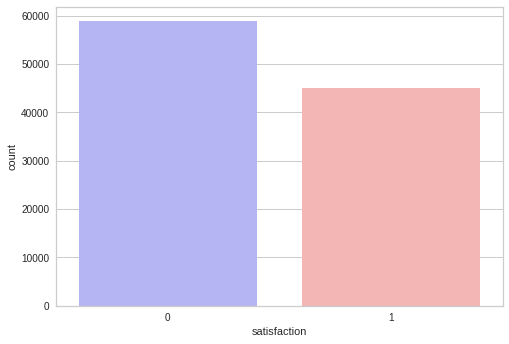

In [ ]:
sns.countplot(x="satisfaction", data=data, palette="bwr")
plt.show()

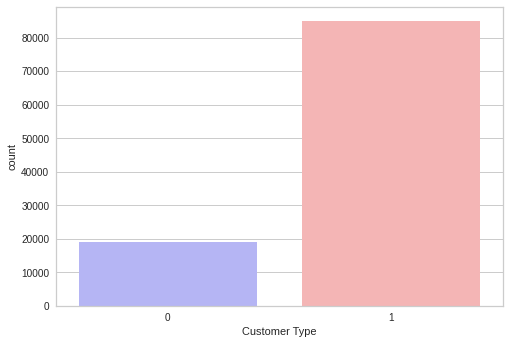

In [ ]:
sns.countplot(x="Customer Type", data=data, palette="bwr")
plt.show()

In [ ]:
data.groupby('satisfaction').mean()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,,,,,
0,0.512797,0.753919,37.566688,0.507974,0.611763,928.919971,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.074594
1,0.500478,0.900233,41.750583,0.927174,1.572549,1530.140255,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.594892


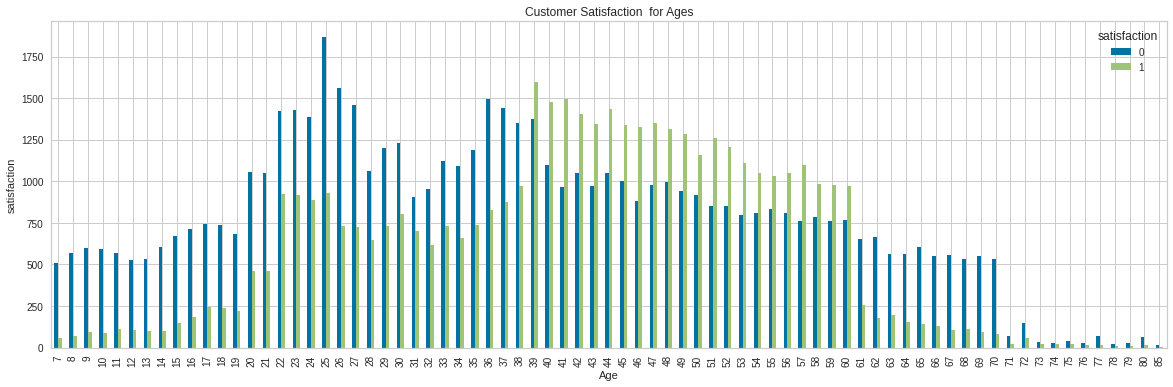

In [ ]:
pd.crosstab(data.Age,data.satisfaction).plot(kind="bar",figsize=(20,6))
plt.title('Customer Satisfaction  for Ages')
plt.xlabel('Age')
plt.ylabel('satisfaction')
plt.savefig('Customor satisfaction.png')
plt.show()

In [ ]:
#we saved the dataset columns names 
feature = dataset.columns
#split the dateset into features  and target 
y = dataset.satisfaction
#drop the column "target" as we saved it in y 
df=dataset.drop(columns="satisfaction",axis=1)
#save other values in X 
X= df.iloc[:,0:18].values # X= data[...]
#X
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [ ]:
X_train

array([[ 0,  0, 37, ...,  2,  3,  1],
       [ 1,  1, 59, ...,  5,  5,  5],
       [ 0,  1, 12, ...,  2,  3,  1],
       ...,
       [ 0,  1, 47, ...,  4,  4,  3],
       [ 1,  1, 55, ...,  2,  2,  1],
       [ 1,  0, 41, ...,  4,  4,  2]])

In [ ]:

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


**modéle d'evaluation :**

In [ ]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, roc_auc

# **Model regression logistique**

Training Accuracy: % 87.33
Test Accuracy: % 87.23
ROC_AUC = 0.8679205093039087
              precision    recall  f1-score   support

           0    0.87718   0.90093   0.88890     11780
           1    0.86558   0.83491   0.84997      9001

    accuracy                        0.87234     20781
   macro avg    0.87138   0.86792   0.86943     20781
weighted avg    0.87216   0.87234   0.87204     20781



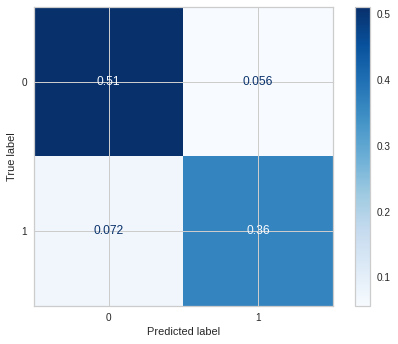

In [ ]:
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)
acc_log_train=round(lr.score(X_train,y_train)*100,2)
acc_log_test=round(lr.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))
lr, roc_auc_rf = run_model(lr, X_train, y_train, X_test, y_test)

**Confusion Matrix (Logistic Regression)**

#**Random Forest**

ROC_AUC = 0.9454106165151618
              precision    recall  f1-score   support

           0    0.94713   0.96104   0.95403     11780
           1    0.94801   0.92979   0.93881      9001

    accuracy                        0.94750     20781
   macro avg    0.94757   0.94541   0.94642     20781
weighted avg    0.94751   0.94750   0.94744     20781



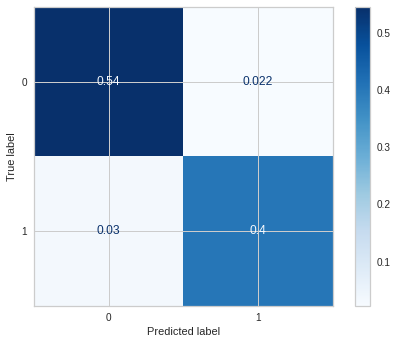

In [ ]:
params_rf = {'max_depth': 10,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 500,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)
#0:satisfied, 1: neutral or dissatisfied

# **Support Vector Machines(SVM)**

In [ ]:
import time
import math

# Save the results here
out_of_the_box_results = np.empty(shape=(3, ))

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"

clf = SVC()

fit_start = time.time()
clf.fit(X_train, y_train)
fit_end = time.time() 

predict_start = time.time()
preds = clf.predict(X_test)
predict_end = time.time()

acc = accuracy_score(y_test, preds) * 100
out_of_the_box_results[2] = acc

fit_time = math.ceil(fit_end - fit_start)
predict_time = math.ceil(predict_end - predict_start)

print('Out-of-the-box SVM classifier')
print('Fit time: {} min {} sec'.format(fit_time // 60, fit_time % 60))
print('Predict time: {} min {} sec'.format(predict_time // 60, predict_time % 60))
print('Total time: {} min {} sec'.format( (fit_time + predict_time) // 60, (fit_time + predict_time) % 60 ))
print('Accuracy: {:.2f} %'.format(acc))



Out-of-the-box SVM classifier
Fit time: 2 min 19 sec
Predict time: 0 min 13 sec
Total time: 2 min 32 sec
Accuracy: 95.14 %


ROC_AUC = 0.9494676926106493
              precision    recall  f1-score   support

           0    0.95078   0.96426   0.95747     11780
           1    0.95234   0.93467   0.94343      9001

    accuracy                        0.95145     20781
   macro avg    0.95156   0.94947   0.95045     20781
weighted avg    0.95146   0.95145   0.95139     20781



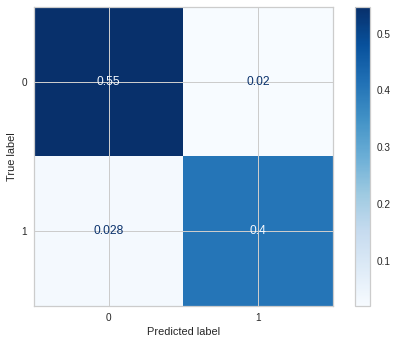

In [ ]:
clf, roc_auc_rf = run_model(clf, X_train, y_train, X_test, y_test)

# **Model selection / GridSearch Hyperparameters**

In [ ]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [ ]:
 cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  9.9min finished


0.9505913326495474
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 35.0min


KeyboardInterrupt: ignored

# **Avec PYCART**

### Comparing multiple models

In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9632,0.9949,0.9395,0.9751,0.9569,0.9248,0.9253,1.204
et,Extra Trees Classifier,0.9598,0.9929,0.9377,0.9689,0.9531,0.9179,0.9183,12.035
rf,Random Forest Classifier,0.9594,0.9932,0.9354,0.9702,0.9525,0.9170,0.9175,9.276
dt,Decision Tree Classifier,0.9459,0.9452,0.9397,0.9363,0.9380,0.8900,0.8900,0.831
gbc,Gradient Boosting Classifier,0.9451,0.9883,0.9219,0.9506,0.9360,0.8880,0.8883,18.204
lr,Logistic Regression,0.9309,0.9783,0.9108,0.9291,0.9198,0.8592,0.8593,18.288
ridge,Ridge Classifier,0.9302,0.0000,0.9071,0.9307,0.9188,0.8576,0.8578,0.146
lda,Linear Discriminant Analysis,0.9302,0.9756,0.9072,0.9307,0.9188,0.8576,0.8578,1.857
ada,Ada Boost Classifier,0.9267,0.9779,0.9097,0.9209,0.9152,0.8506,0.8507,3.952
nb,Naive Bayes,0.8813,0.9472,0.8327,0.8876,0.8593,0.7569,0.7580,0.162


In [ ]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Tuning the best model

In [ ]:
tuned_lgbm = tune_model(best_model) # l'entrennement de best model  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9605,0.9946,0.9378,0.9706,0.9539,0.9194,0.9198
1,0.9582,0.9936,0.9362,0.9667,0.9512,0.9147,0.9150
2,0.9600,0.9947,0.9362,0.9708,0.9532,0.9183,0.9187
3,0.9596,0.9938,0.9393,0.9668,0.9529,0.9175,0.9178
4,0.9604,0.9942,0.9359,0.9721,0.9536,0.9191,0.9196
5,0.9592,0.9934,0.9355,0.9695,0.9522,0.9166,0.9170
6,0.9578,0.9930,0.9352,0.9667,0.9507,0.9138,0.9142
7,0.9599,0.9941,0.9359,0.9708,0.9530,0.9180,0.9185
8,0.9627,0.9944,0.9425,0.9710,0.9565,0.9239,0.9243
9,0.9633,0.9944,0.9374,0.9773,0.9569,0.9250,0.9256


### ploting model : feature Importance

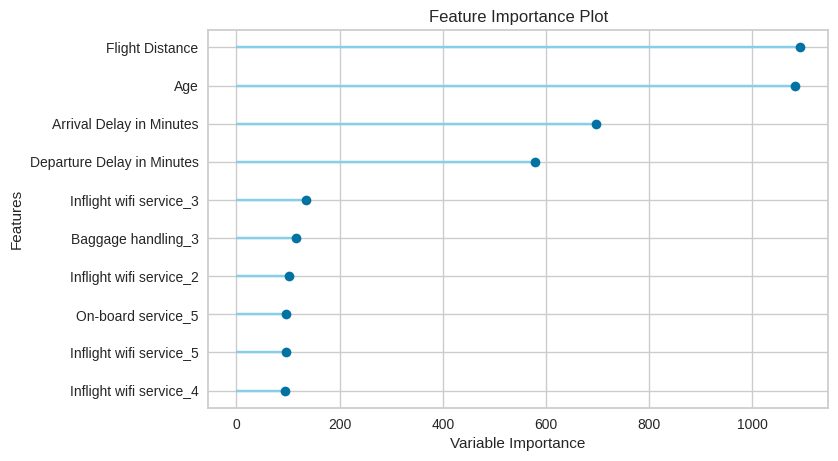

In [ ]:
plot_model(tuned_lgbm, plot='feature')


### Predicting Satisfaction on the Unseen data points

In [ ]:
pred_unseen = predict_model(tuned_lgbm, data = data_unseen)

In [ ]:
pred_unseen

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Label,Score
0,1,1,26,0,0,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,0,0,0.9955
1,0,1,53,1,0,834,1,4,4,4,1,1,1,1,1,1,3,4,4,1,28,8.0,0,0,0.9894
2,1,1,60,0,0,861,2,2,2,3,1,3,4,4,4,2,4,4,4,4,10,10.0,0,0,0.9981
3,0,1,40,1,2,602,5,5,5,5,2,5,5,5,5,5,5,3,5,4,0,0.0,1,1,0.9993
4,0,0,39,1,2,895,2,2,2,4,5,2,5,5,5,4,4,5,5,5,0,2.0,0,0,0.8699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,1,1,54,1,2,1452,3,3,5,3,4,4,4,3,3,3,3,4,3,5,19,14.0,1,1,0.9246
5191,0,0,37,1,2,1900,1,2,2,1,5,2,5,5,5,4,4,4,5,5,0,0.0,0,0,0.9578
5192,0,1,48,1,2,74,5,5,5,5,5,4,4,4,4,4,4,3,4,4,0,0.0,1,1,0.9944
5193,1,1,51,1,2,384,2,2,2,2,5,5,5,4,4,4,4,3,4,3,54,51.0,1,1,0.9984


# **Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9483,0.9480,0.9460,0.9359,0.9409,0.8950,0.8950
1,0.9472,0.9462,0.9387,0.9399,0.9393,0.8926,0.8926
2,0.9453,0.9448,0.9412,0.9336,0.9374,0.8888,0.8888
3,0.9457,0.9451,0.9403,0.9353,0.9378,0.8896,0.8896
4,0.9501,0.9493,0.9428,0.9425,0.9427,0.8985,0.8985
5,0.9465,0.9461,0.9428,0.9348,0.9388,0.8913,0.8913
6,0.9439,0.9432,0.9378,0.9336,0.9357,0.8859,0.8860
7,0.9432,0.9424,0.9365,0.9332,0.9349,0.8845,0.8845
8,0.9427,0.9419,0.9359,0.9326,0.9342,0.8834,0.8834
9,0.9462,0.9449,0.9349,0.9412,0.9380,0.8906,0.8906


In [ ]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9104,0.9661,0.8838,0.9079,0.8956,0.8171,0.8173
1,0.9133,0.9680,0.8790,0.9182,0.8982,0.8227,0.8233
2,0.9099,0.9653,0.8768,0.9128,0.8944,0.8160,0.8165
3,0.9150,0.9687,0.8815,0.9199,0.9003,0.8263,0.8269
4,0.9167,0.9691,0.8768,0.9278,0.9016,0.8294,0.8304
5,0.9106,0.9652,0.8780,0.9132,0.8953,0.8174,0.8179
6,0.9137,0.9678,0.8831,0.9155,0.8990,0.8236,0.8240
7,0.9152,0.9682,0.8790,0.9224,0.9002,0.8265,0.8272
8,0.9187,0.9681,0.8863,0.9239,0.9047,0.8339,0.8345
9,0.9113,0.9668,0.8777,0.9150,0.8960,0.8188,0.8193


In [ ]:
pred_dt = predict_model(tuned_dt, data = data_unseen)
pred_dt

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Label,Score
0,1,1,26,0,0,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,0,0,1.0000
1,0,1,53,1,0,834,1,4,4,4,1,1,1,1,1,1,3,4,4,1,28,8.0,0,0,0.8936
2,1,1,60,0,0,861,2,2,2,3,1,3,4,4,4,2,4,4,4,4,10,10.0,0,0,1.0000
3,0,1,40,1,2,602,5,5,5,5,2,5,5,5,5,5,5,3,5,4,0,0.0,1,1,0.9955
4,0,0,39,1,2,895,2,2,2,4,5,2,5,5,5,4,4,5,5,5,0,2.0,0,1,0.5568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190,1,1,54,1,2,1452,3,3,5,3,4,4,4,3,3,3,3,4,3,5,19,14.0,1,1,0.9061
5191,0,0,37,1,2,1900,1,2,2,1,5,2,5,5,5,4,4,4,5,5,0,0.0,0,1,0.5568
5192,0,1,48,1,2,74,5,5,5,5,5,4,4,4,4,4,4,3,4,4,0,0.0,1,1,0.9061
5193,1,1,51,1,2,384,2,2,2,2,5,5,5,4,4,4,4,3,4,3,54,51.0,1,1,0.9955


###  Finalize and save Model

In [ ]:
final_lgbm = finalize_model(tuned_lgbm)

In [ ]:
save_model(final_lgbm,'Final Lgbm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='satisfaction',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1, min_child_samples=66,
            